<a href="https://colab.research.google.com/github/kae4ka/employee-behavior/blob/main/employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# read dataset
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
# drop dublicates
df = df[~df.duplicated()]
# drop NaNs
df = df.dropna()
# reset indexes
df.reset_index(drop=True)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
2759,Masters,2017,Pune,2,31,Female,No,2,0
2760,Bachelors,2016,Pune,3,30,Male,No,2,0
2761,Masters,2013,Pune,2,37,Male,No,2,1
2762,Masters,2018,New Delhi,3,27,Male,No,5,1


# EDA

**1) Education:** education level

**2) JoiningYear:** year of joing company

**3) City:** city office

**4) PaymentTier:** payment tier: 1 - high, 2 - middle, 3 - low

**5) Age:** current age

**6) Gender:** gender

**7) EverBenched:** ever kept out of project for 1 month or more

**8) ExperienceInCurrentDomain:** experience in current field

**9) LeaveOrNot:** whether employee leaves company in next 2 years 

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.shape

(2764, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [ ]:
# these are categorical features
df.PaymentTier = df.PaymentTier.astype('object')

In [ ]:
df.LeaveOrNot = df.LeaveOrNot.astype('object')

In [ ]:
# describe numerical features
df.describe().round(2)

,JoiningYear,Age,ExperienceInCurrentDomain
count,2764.00,2764.00,2764.00
mean,2015.09,30.95,2.64
std,1.89,5.11,1.61
min,2012.00,22.00,0.00
25%,2013.00,27.00,1.00
50%,2015.00,30.00,2.00
75%,2017.00,35.00,4.00
max,2018.00,41.00,7.00


In [ ]:
df.ExperienceInCurrentDomain[df.ExperienceInCurrentDomain == 0].count()/df.ExperienceInCurrentDomain.count()

0.10383502170767005

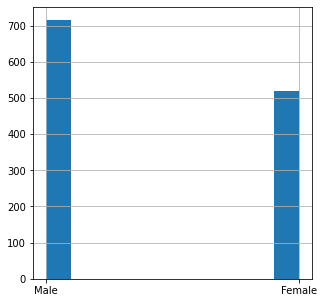

In [ ]:
# plot numerical features
df.Gender[df.Age > 30].hist(figsize=(5,5))
plt.show()

In [ ]:
df.describe(include='object')

,Education,City,PaymentTier,Gender,EverBenched,LeaveOrNot
count,2764,2764,2764,2764,2764,2764
unique,3,3,3,2,2,2
top,Bachelors,Bangalore,3,Male,No,0
freq,1971,1171,1976,1529,2403,1676


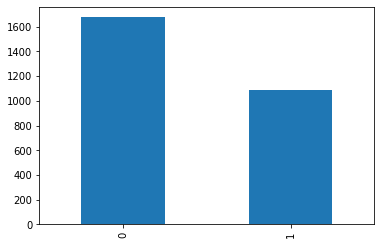

In [ ]:
df.LeaveOrNot.value_counts().plot(kind='bar')

In [ ]:
df.Education.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
df.Education.value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

In [ ]:
edu = pd.get_dummies(np.array(df.Education))
edu = edu.drop(columns = ['Bachelors'])
edu

,Masters,PHD
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
2759,1,0
2760,0,0
2761,1,0
2762,1,0


In [ ]:
df.City.value_counts()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

In [ ]:
city = pd.get_dummies(np.array(df.City))

In [ ]:
print(city)

      Bangalore  New Delhi  Pune
0             1          0     0
1             0          0     1
2             0          1     0
3             1          0     0
4             0          0     1
...         ...        ...   ...
2759          0          0     1
2760          0          0     1
2761          0          0     1
2762          0          1     0
2763          1          0     0

[2764 rows x 3 columns]


In [ ]:
df.Gender.value_counts()

Male      1529
Female    1235
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df.Gender.replace(['Female', 'Male'], [1, 0])

<ipython-input-43-77dd308be6ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df.Gender.replace(['Female', 'Male'], [1, 0])


In [ ]:
df.EverBenched.value_counts()

No     2403
Yes     361
Name: EverBenched, dtype: int64

In [ ]:
df['EverBenched'] = df.EverBenched.replace(['Yes', 'No'], [1, 0])

<ipython-input-45-7b894ed8a054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EverBenched'] = df.EverBenched.replace(['Yes', 'No'], [1, 0])


In [ ]:
df = df.drop(columns=['Education', 'City'])

In [ ]:
df[edu.columns] = edu

In [ ]:
df[city.columns] = city

In [ ]:
df

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Masters,PHD,Bangalore,New Delhi,Pune
0,2017,3,34,0,0,0,0,0.0,0.0,1.0,0.0,0.0
1,2013,1,28,1,0,3,1,0.0,0.0,0.0,0.0,1.0
2,2014,3,38,1,0,2,0,0.0,0.0,0.0,1.0,0.0
3,2016,3,27,0,0,5,1,1.0,0.0,1.0,0.0,0.0
4,2017,3,24,0,1,2,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,2017,2,31,1,0,2,0,NaN,NaN,NaN,NaN,NaN
4647,2016,3,30,0,0,2,0,NaN,NaN,NaN,NaN,NaN
4649,2013,2,37,0,0,2,1,NaN,NaN,NaN,NaN,NaN
4650,2018,3,27,0,0,5,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=(df-df.min())/(df.max()-df.min())

In [ ]:
df.corr()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Masters,PHD,Bangalore,New Delhi,Pune
JoiningYear,1.000000,-0.096078,0.013165,0.012213,0.049353,-0.036525,0.181705,0.191759,-0.001362,-0.104668,0.141744,-0.020167
PaymentTier,-0.096078,1.000000,0.007631,-0.235119,0.019207,0.018314,-0.197638,-0.199632,0.011966,0.293730,-0.102642,-0.229910
Age,0.013165,0.007631,1.000000,0.003866,-0.016135,-0.134643,-0.051126,-0.010192,-0.004029,0.039918,-0.032461,-0.013273
Gender,0.012213,-0.235119,0.003866,1.000000,-0.019653,-0.008745,0.220701,0.021561,-0.007133,-0.209460,0.155877,0.083685
EverBenched,0.049353,0.019207,-0.016135,-0.019653,1.000000,0.001408,0.078438,-0.013930,-0.056639,0.018590,-0.029246,0.007534
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,-0.008745,0.001408,1.000000,-0.030504,-0.006584,0.000637,0.011654,-0.007608,-0.005690
LeaveOrNot,0.181705,-0.197638,-0.051126,0.220701,0.078438,-0.030504,1.000000,0.145801,-0.038938,-0.154996,-0.033341,0.206264
Masters,0.191759,-0.199632,-0.010192,0.021561,-0.013930,-0.006584,0.145801,1.000000,-0.096126,-0.323998,0.381977,-0.007299
PHD,-0.001362,0.011966,-0.004029,-0.007133,-0.056639,0.000637,-0.038938,-0.096126,1.000000,-0.075407,0.151214,-0.062189
Bangalore,-0.104668,0.293730,0.039918,-0.209460,0.018590,0.011654,-0.154996,-0.323998,-0.075407,1.000000,-0.551420,-0.586654


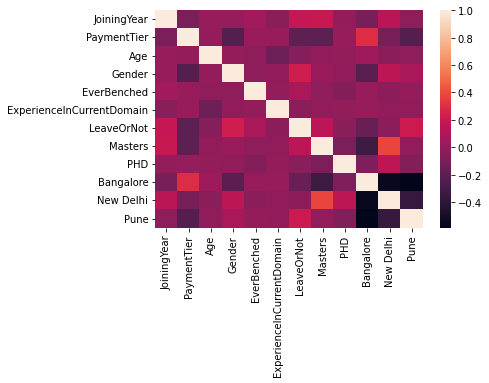

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X = df.drop(columns=['LeaveOrNot'])
y = df.LeaveOrNot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

array([[0.84746289, 0.15253711]])

In [ ]:
clf.score(X_test, y_test)

0.859375

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.score(X_test, y_test)

0.8268229166666666

In [ ]:
import sklearn
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, clf.predict(X_test))

0.3788455201749392

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.17216059744716927

In [ ]:
sklearn.metrics.r2_score(y_test, reg.predict(X_test))

0.17216059744716927

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7408854166666666

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, logreg.predict_proba(X)[:, 1])

roc_auc_score(y, logreg.decision_function(X))

0.736010686210285